In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.utils import plot_model


In [2]:
# Exemplu de corpus de texte
corpus = [
    'Acesta este un exemplu de text.',
    'Învățarea automată este fascinantă.',
    'Modelele de limbaj sunt puternice.'
]

# Inițializați Tokenizer-ul
tokenizer = Tokenizer()

# Antrenați Tokenizer-ul pe corpus
tokenizer.fit_on_texts(corpus)

# Obțineți dimensiunea vocabularului
vocab_size = len(tokenizer.word_index) + 1


In [3]:
# Convertiți textele în secvențe numerice
sequences = tokenizer.texts_to_sequences(corpus)

# Aplicați padding pentru a uniformiza lungimea secvențelor
max_length = 200  # Lungimea maximă a secvențelor
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')


In [4]:
# Definiți modelul LSTM
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
lstm_model.add(LSTM(units=100, return_sequences=True))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(units=100))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compilați modelul
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


c:\Users\Here\anaconda3\envs\gputf3.10\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


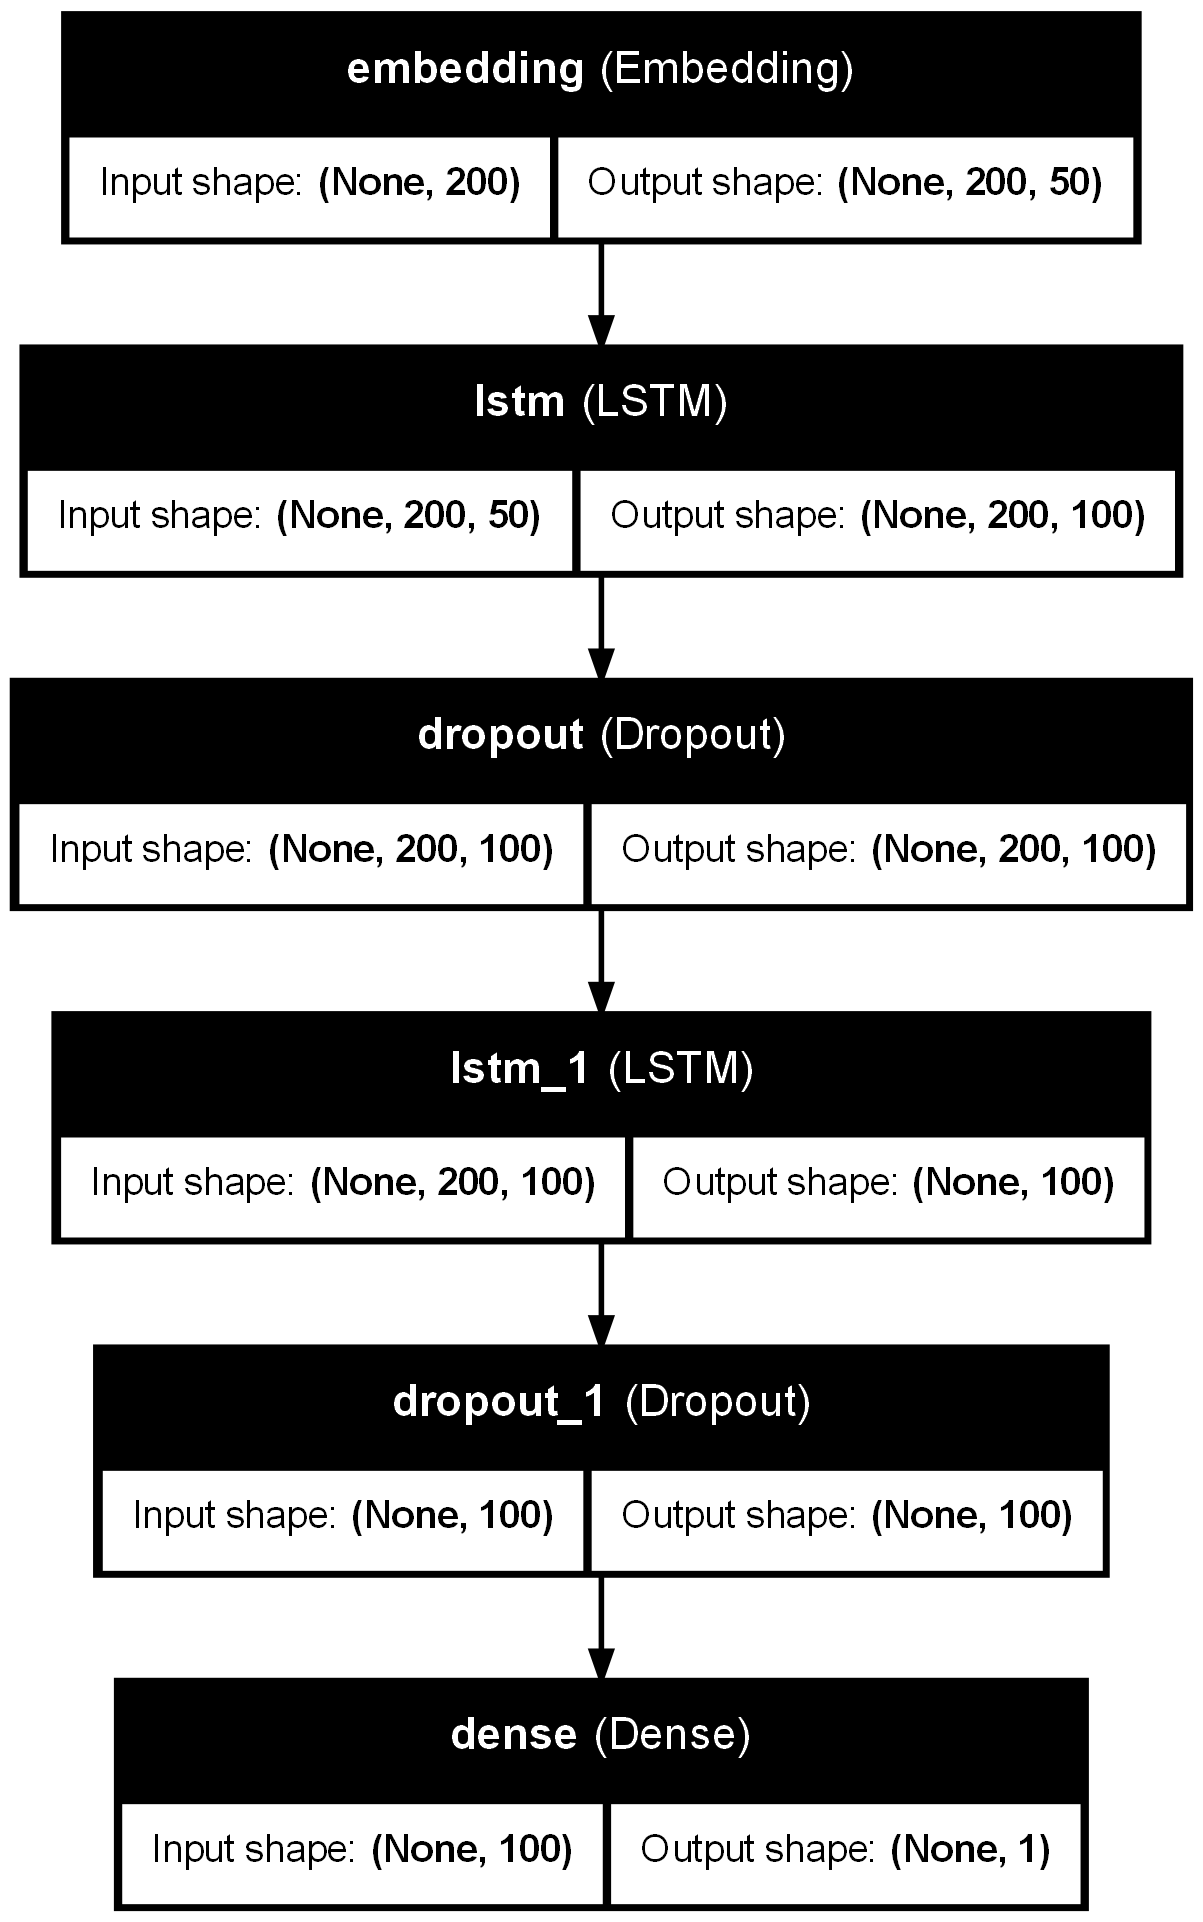

In [8]:
import numpy as np

dummy_input = np.zeros((1, 200))
_ = lstm_model(dummy_input)  # Acest apel va construi modelul
plot_model(lstm_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
